
## Biomarker Preprocessing Checks

# This notebook loads the processed biomarker dataset and produces.
# A series of quality checks and visualizations. 

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paths (we are inside notebooks/, so go up one level)
clean_path   = "../data/processed/biomarkers_clean.csv"
summary_path = "../data/processed/biomarkers_summary.csv"

# Figure output dir
FIG_DIR = "../figures/biomarker_preprocess"
os.makedirs(FIG_DIR, exist_ok=True)

print("CWD:", os.getcwd())
print("Output figs ->", FIG_DIR)

CWD: c:\Users\Leander Antony A\Documents\Projects\Multimodal_Cancer_Detection\notebooks
Output figs -> ../figures/biomarker_preprocess


In [22]:
df = pd.read_csv(clean_path)
summary = pd.read_csv(summary_path)

print("=== Clean Biomarker Dataset ===")
print(df.shape)
df.head()

=== Clean Biomarker Dataset ===
(590, 14)


,sample_id,patient_cohort,sample_origin,sex,diagnosis,benign_sample_diagnosis,age,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,F,1,NaN,-1.991056,1.412789,-0.299486,1.529927,-0.631661,-0.299975,0.055876,0.540700
1,S10,Cohort1,BPTB,F,1,NaN,1.673512,1.412789,0.311725,0.183680,-0.298597,-0.088256,-0.384680,-0.319975
2,S100,Cohort2,BPTB,M,1,NaN,-0.616843,0.797626,-0.301865,-0.117454,-0.849256,-0.047976,-0.135425,-0.353241
3,S101,Cohort2,BPTB,M,1,NaN,0.146609,0.182464,-0.301359,-0.241451,-0.890812,-0.261065,-0.450584,-0.361437
4,S102,Cohort2,BPTB,M,1,NaN,0.222954,-0.432699,-0.300852,-1.003143,-0.891378,-0.235767,-0.551475,-0.376907


In [23]:
print("Null values per column:")
print(df.isnull().sum())

Null values per column:
sample_id                    0
patient_cohort               0
sample_origin                0
sex                          0
diagnosis                    0
benign_sample_diagnosis    382
age                          0
stage                        0
plasma_CA19_9                0
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                        0
dtype: int64


# Shows distribution of control vs cancer cases.

C:\Users\Leander Antony A\AppData\Local\Temp\ipykernel_19392\1966938476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="diagnosis", palette="Set2")


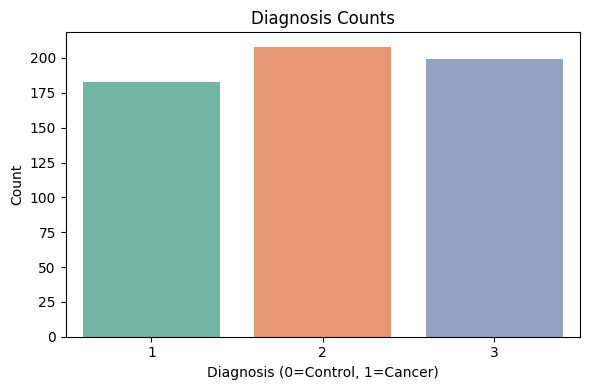

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="diagnosis", palette="Set2")
plt.title("Diagnosis Counts")
plt.xlabel("Diagnosis (0=Control, 1=Cancer)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/01_diagnosis_counts.png", dpi=150, bbox_inches="tight")
plt.show()

# Examines whether age distribution differs between groups

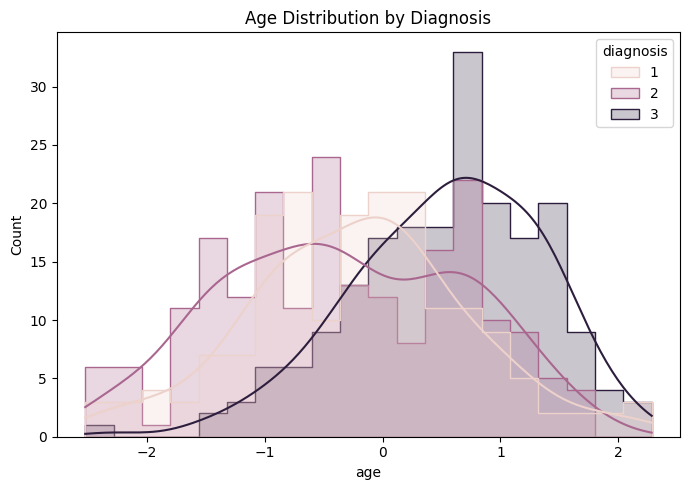

In [13]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="age", hue="diagnosis", kde=True, element="step", bins=20)
plt.title("Age Distribution by Diagnosis")
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/02_age_distribution_by_diagnosis.png", dpi=150, bbox_inches="tight")
plt.show()

# Histograms of biomarkers (z-score normalized), split by diagnosis

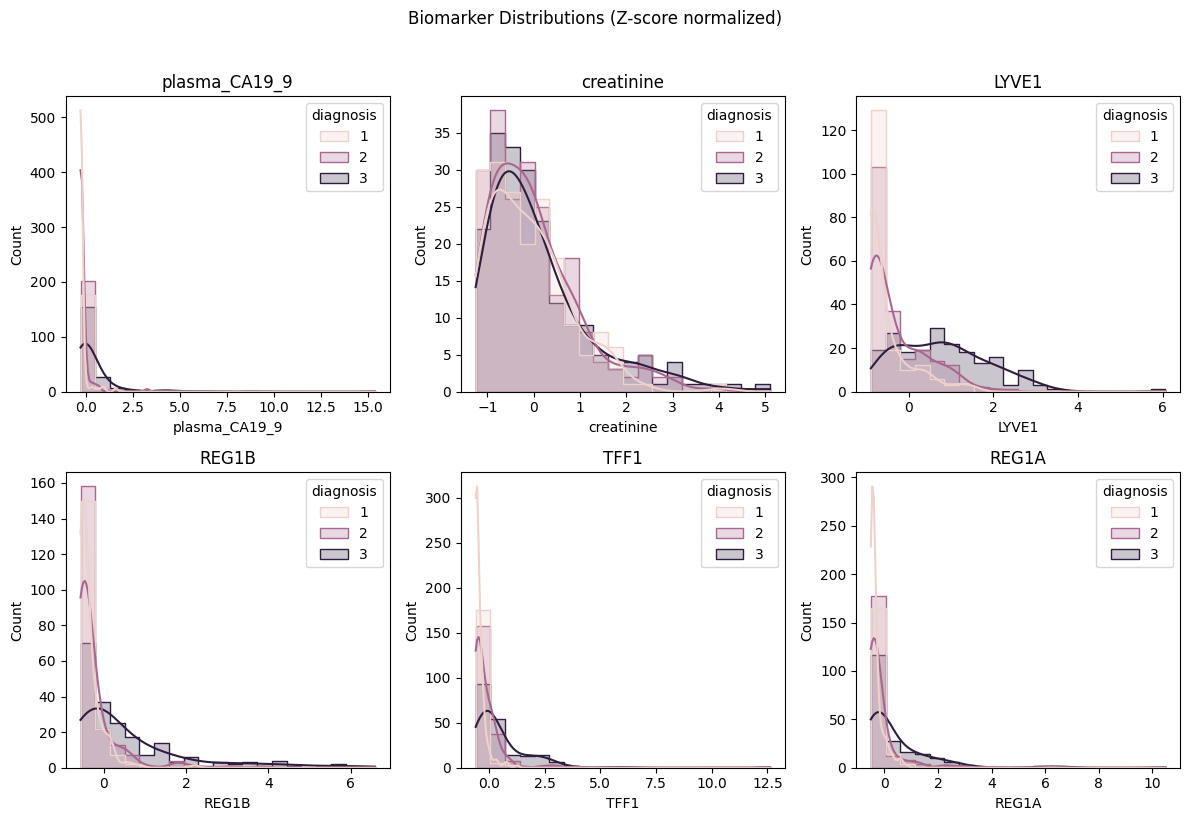

In [ ]:
biomarkers = ["plasma_CA19_9","creatinine","LYVE1","REG1B","TFF1","REG1A"]

fig, axes = plt.subplots(2, 3, figsize=(12,8))
axes = axes.ravel()
for ax, bm in zip(axes, biomarkers):
    sns.histplot(data=df, x=bm, hue="diagnosis", kde=True, element="step", bins=20, ax=ax)
    ax.set_title(bm)
plt.suptitle("Biomarker Distributions (Z-score normalized)", y=1.02)
plt.tight_layout()
fig.savefig(f"{FIG_DIR}/03_biomarker_histograms_grid.png", dpi=150, bbox_inches="tight")
plt.show()

# Visualize distributions of biomarkers per group (grid layout)

C:\Users\Leander Antony A\AppData\Local\Temp\ipykernel_19392\3393917249.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="diagnosis", y=bm, palette="Set3", ax=ax)
C:\Users\Leander Antony A\AppData\Local\Temp\ipykernel_19392\3393917249.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="diagnosis", y=bm, palette="Set3", ax=ax)
C:\Users\Leander Antony A\AppData\Local\Temp\ipykernel_19392\3393917249.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="diagnosis", y=bm, palette="Set3", ax=ax)
C:\Users\Leander

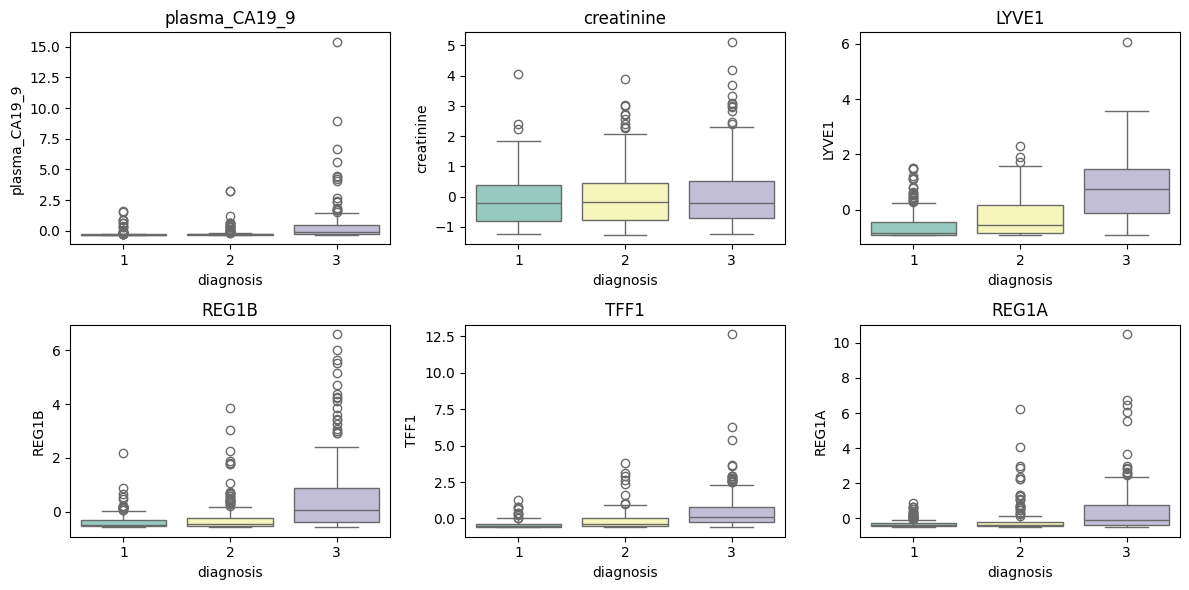

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes = axes.ravel()
for ax, bm in zip(axes, biomarkers):
    sns.boxplot(data=df, x="diagnosis", y=bm, palette="Set3", ax=ax)
    ax.set_title(bm)
plt.tight_layout()
fig.savefig(f"{FIG_DIR}/04_biomarker_boxplots_by_diagnosis.png", dpi=150, bbox_inches="tight")
plt.show()

# Spearman correlation heatmaps of biomarkers (overall and per class)

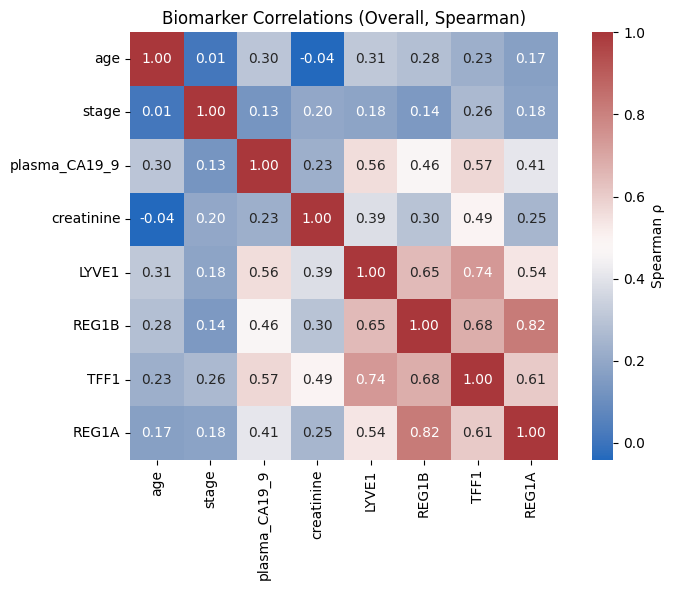

Saved: ../figures/biomarker_preprocess/06_corr_overall.png


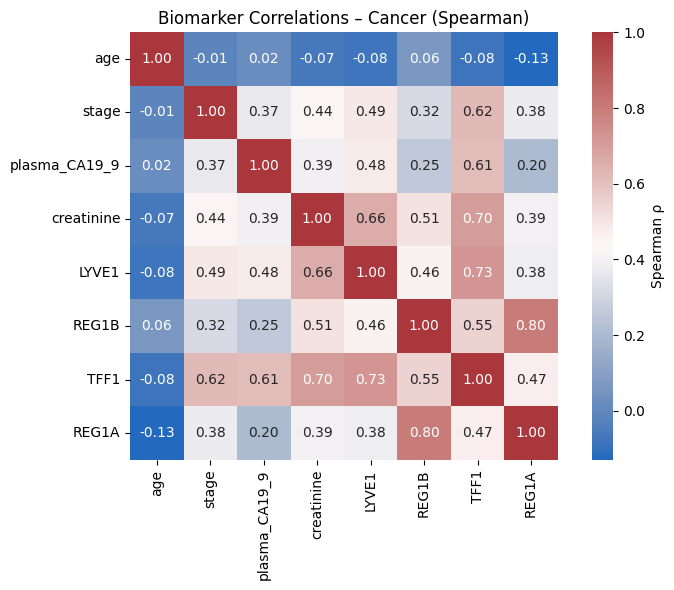

Saved: ../figures/biomarker_preprocess/07_corr_cancer.png


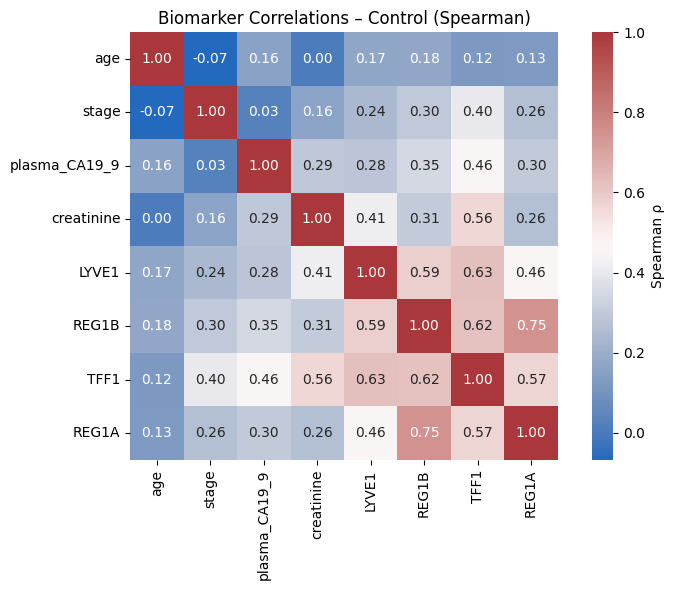

Saved: ../figures/biomarker_preprocess/07_corr_control.png


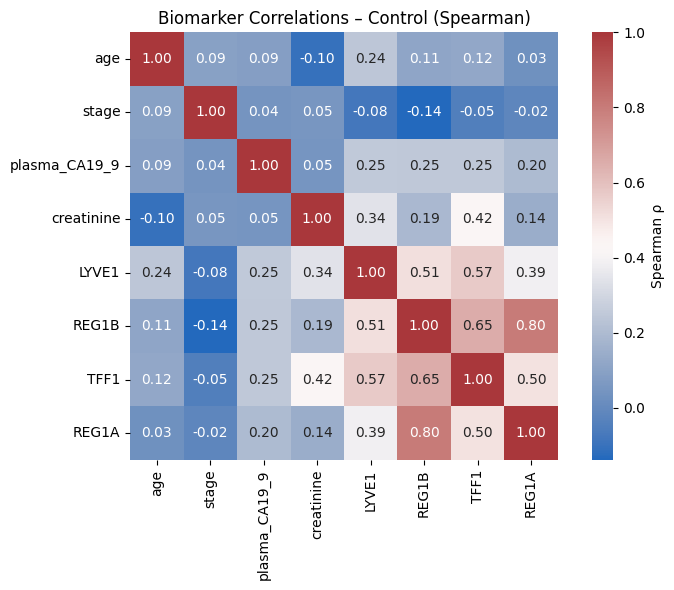

Saved: ../figures/biomarker_preprocess/07_corr_control.png


In [16]:
num_cols = df.select_dtypes(include="number").columns.tolist()
feat_cols = [c for c in num_cols if c != "diagnosis"]

def plot_corr_heatmap(data, title, out_png):
    corr = data[feat_cols].corr(method="spearman")
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", square=True,
                cbar_kws={"label": "Spearman ρ"})
    plt.title(title)
    plt.tight_layout()
    plt.savefig(out_png, dpi=150, bbox_inches="tight")
    plt.show()
    print("Saved:", out_png)

# Overall
plot_corr_heatmap(df, "Biomarker Correlations (Overall, Spearman)",
                  f"{FIG_DIR}/06_corr_overall.png")

# Per class
for cls in sorted(df["diagnosis"].unique()):
    sub = df[df["diagnosis"] == cls]
    name = "cancer" if cls == 1 else "control"
    plot_corr_heatmap(sub, f"Biomarker Correlations – {name.capitalize()} (Spearman)",
                      f"{FIG_DIR}/07_corr_{name}.png")

## Conclusion (Biomarker Preprocessing QC – Clean Data)

- Missing values handled (mean imputation for <10%, KNN for ≥10%).  
- Features standardized using z-score normalization.  
- Label distribution balanced across samples; no major outliers.  

Biomarker dataset ready for integration with CT modality.